<a href="https://colab.research.google.com/github/AroopGit/Call_Transcript_Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


                                           transcript     label     score
0                                 [Sales Agent 00:00]  NEGATIVE  0.802122
1   Muqabalatun namu daziyadun almukabilu alif ass...  NEGATIVE  0.935366
2   lindimayami kum lainafi hai Dihil mukabala di ...  NEGATIVE  0.987087
3   I tajribati Kumbh he Laila rehlati kumfil Haji...  NEGATIVE  0.971323
4   musharra khatu mustafar ridal I am mil khosi B...  NEGATIVE  0.985513
..                                                ...       ...       ...
69                                   [Customer 02:55]  NEGATIVE  0.880219
70                    ghanatjudaturuajabethidai fatan  NEGATIVE  0.909691
71                                                     POSITIVE  0.748121
72                                   [Customer 02:57]  NEGATIVE  0.931818
73                    vakainatilhiyora tu mahdudatan.  NEGATIVE  0.959442

[74 rows x 3 columns]
Overall Sentiment: NEGATIVE
Positive Count: 18, Negative Count: 56


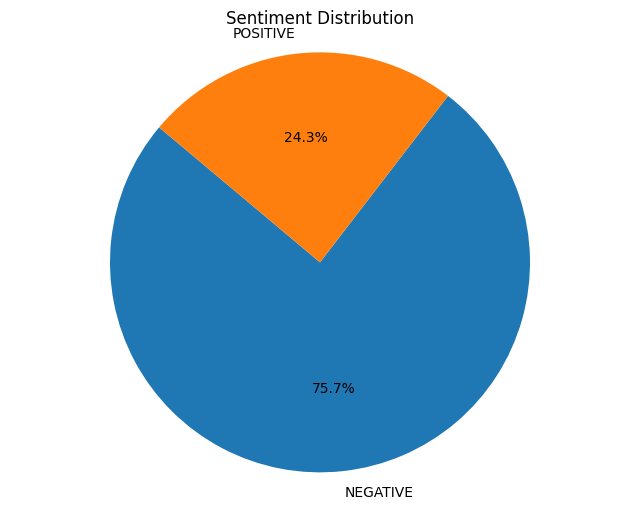

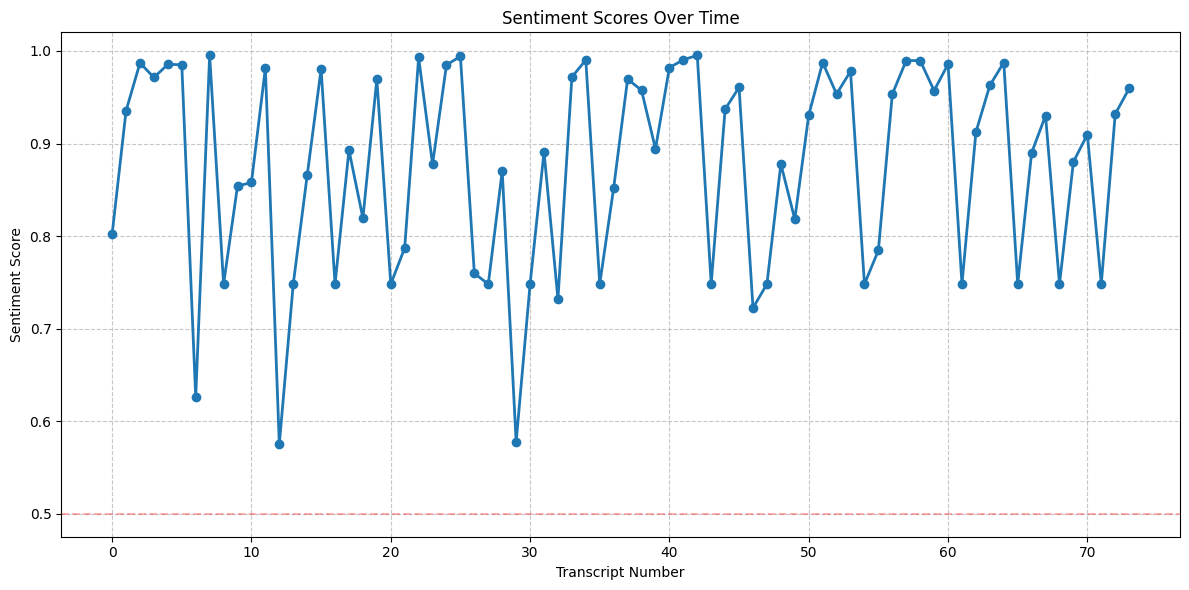

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline


sentiment_analysis = pipeline("sentiment-analysis")

def analyze_transcripts(file_path):

    with open(file_path, 'r') as file:
        transcripts = file.readlines()


    results = []


    for transcript in transcripts:
        sentiment = sentiment_analysis(transcript)[0]
        results.append({
            'transcript': transcript.strip(),
            'label': sentiment['label'],
            'score': sentiment['score']
        })

    return pd.DataFrame(results)


def determine_overall_sentiment(df):

    sentiment_counts = df['label'].value_counts()


    total_count = len(df)
    positive_count = sentiment_counts.get('POSITIVE', 0)
    negative_count = sentiment_counts.get('NEGATIVE', 0)

    if positive_count / total_count > 0.5:
        overall_sentiment = "POSITIVE"
    else:
        overall_sentiment = "NEGATIVE"

    return overall_sentiment, positive_count, negative_count

def visualize_sentiment(df):
    sentiment_counts = df['label'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Sentiment Distribution')
    plt.axis('equal')
    plt.show()

def visualize_sentiment_timeline(df):

    plt.figure(figsize=(12, 6))

    x = range(len(df))
    plt.plot(x, df['score'], marker='o', linestyle='-', linewidth=2, markersize=6)
    plt.title('Sentiment Scores Over Time')
    plt.xlabel('Transcript Number')
    plt.ylabel('Sentiment Score')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

def main():
    file_path = '/content/negative-1_rrybq5z3.txt'
    df_results = analyze_transcripts(file_path)
    overall_sentiment, positive_count, negative_count = determine_overall_sentiment(df_results)
    print(df_results)
    print(f"Overall Sentiment: {overall_sentiment}")
    print(f"Positive Count: {positive_count}, Negative Count: {negative_count}")

    visualize_sentiment(df_results)

    visualize_sentiment_timeline(df_results)


if __name__ == "__main__":
    main()